<h1>Number of Students by Higher Education provider</h1>
<p>In these notes we look at creating a scatter plot based on a set of data.  We have a datafile named numberOfStudentsFull_18_19.csv (available on blackboard).</p>
<p>Datafile provided by HESA, available at: <a href="https://www.hesa.ac.uk/data-and-analysis/students/table-1"> Original Datafile </a></p>
<p>
Our task is to read the contents of the file into a data frame and to create a scatter plot that shows the number of male students vs the number of female students for each institution.
</p>

<h2>Import PANDAs and Matplotlib.pylot</h2>
<p>You will be using the pandas DataFrame to store the data and Matplotlib pyplot to plot the data.  Import the necessary libraries</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<h2>Read the data into a PANDAs DataFrame</h2>
<p>Read the 'numberOfStudentsFull_18_19.csv' into a DataFrame called df, use the head method to output the first 20 rows of the datafile so that the structure of the DataFrame can be explored.</p>
<p>Try to identify where the column headings start within the datafile.  Adjust the read_csv paramters to skip past the summary information so that the columns within the datafile are the columns within the DataFrame</p>

In [2]:
df = pd.read_csv("numberOfStudentsFull_18_19.csv")

/tmp/ipykernel_9416/163079660.py:1: DtypeWarning: Columns (0,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("numberOfStudentsFull_18_19.csv")


<h2>Filter the Data</h2>
<p>Filter the data within the DataFrame. You want to show the total number of Female, Male and Other sex students that are studying an undergraduate degree full-time, for each HE provider.
You are also interested in the Country of HE provider. Make a copy of the original DataFrame into a new DataFrame named df2 just in case you make a mistake - use the copy method.
</p>
<p>Resulting Dataframe Output</p>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>HE provider</th>
      <th>Country of HE provider</th>
      <th>Category</th>
      <th>Number</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>492450</td>
      <td>The University of Aberdeen</td>
      <td>Scotland</td>
      <td>Female</td>
      <td>5620</td>
    </tr>
    <tr>
      <td>492451</td>
      <td>The University of Aberdeen</td>
      <td>Scotland</td>
      <td>Male</td>
      <td>4085</td>
    </tr>
    <tr>
      <td>492452</td>
      <td>The University of Aberdeen</td>
      <td>Scotland</td>
      <td>Other</td>
      <td>0</td>
    </tr>
    <tr>
      <td>492954</td>
      <td>University of Abertay Dundee</td>
      <td>Scotland</td>
      <td>Female</td>
      <td>1775</td>
    </tr>
    <tr>
      <td>492955</td>
      <td>University of Abertay Dundee</td>
      <td>Scotland</td>
      <td>Male</td>
      <td>1895</td>
    </tr>
    <tr>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <td>570767</td>
      <td>York St John University</td>
      <td>England</td>
      <td>Male</td>
      <td>1920</td>
    </tr>
    <tr>
      <td>570768</td>
      <td>York St John University</td>
      <td>England</td>
      <td>Other</td>
      <td>0</td>
    </tr>
    <tr>
      <td>571270</td>
      <td>The University of York</td>
      <td>England</td>
      <td>Female</td>
      <td>7460</td>
    </tr>
    <tr>
      <td>571271</td>
      <td>The University of York</td>
      <td>England</td>
      <td>Male</td>
      <td>6095</td>
    </tr>
    <tr>
      <td>571272</td>
      <td>The University of York</td>
      <td>England</td>
      <td>Other</td>
      <td>0</td>
    </tr>
  </tbody>
</table>

In [3]:
df.head(20)

,Title,"HE student enrolments by HE provider, domicile, level of study, mode of study, first year marker, sex and academic year",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Location,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Academic years,2018/19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Data source,HESA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Data source link,https://www.hesa.ac.uk/data-and-analysis/stude...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Data file canonical link,https://www.hesa.ac.uk/data-and-analysis/stude...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Licence,Creative Commons Attribution 4.0 International...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Code page,Unicode UTF-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Disclaimer,Please note that this data includes rounded to...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Table 2018/19 total,2383970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# saving for the sake of saving
df2 = df.copy()

In [5]:
# masking by sex
mask = (df['Unnamed: 8'] == 'Sex') & (df['Unnamed: 6'] == 'Full-time') & (df['Unnamed: 2'] != 'All') & (df['Unnamed: 4'] == 'All') & (df['Unnamed: 5'] == 'All undergraduate') & (df['Unnamed: 3'] == 'All') & (df['Unnamed: 3'] == 'All') & (df['HE student enrolments by HE provider, domicile, level of study, mode of study, first year marker, sex and academic year'] != 'Total')
df = df[mask]
df.head(20)

,Title,"HE student enrolments by HE provider, domicile, level of study, mode of study, first year marker, sex and academic year",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
492464,10007783.0,The University of Aberdeen,Scotland,All,All,All undergraduate,Full-time,2018/19,Sex,Female,5620
492465,10007783.0,The University of Aberdeen,Scotland,All,All,All undergraduate,Full-time,2018/19,Sex,Male,4085
492466,10007783.0,The University of Aberdeen,Scotland,All,All,All undergraduate,Full-time,2018/19,Sex,Other,0
492968,10007849.0,University of Abertay Dundee,Scotland,All,All,All undergraduate,Full-time,2018/19,Sex,Female,1775
492969,10007849.0,University of Abertay Dundee,Scotland,All,All,All undergraduate,Full-time,2018/19,Sex,Male,1895
492970,10007849.0,University of Abertay Dundee,Scotland,All,All,All undergraduate,Full-time,2018/19,Sex,Other,5
493472,10007856.0,Aberystwyth University,Wales,All,All,All undergraduate,Full-time,2018/19,Sex,Female,2900
493473,10007856.0,Aberystwyth University,Wales,All,All,All undergraduate,Full-time,2018/19,Sex,Male,2785
493474,10007856.0,Aberystwyth University,Wales,All,All,All undergraduate,Full-time,2018/19,Sex,Other,25
493976,10000163.0,AECC University College,England,All,All,All undergraduate,Full-time,2018/19,Sex,Female,215


In [6]:
df.drop(columns = ['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Title'], inplace = True)
df

,"HE student enrolments by HE provider, domicile, level of study, mode of study, first year marker, sex and academic year",Unnamed: 2,Unnamed: 9,Unnamed: 10
492464,The University of Aberdeen,Scotland,Female,5620
492465,The University of Aberdeen,Scotland,Male,4085
492466,The University of Aberdeen,Scotland,Other,0
492968,University of Abertay Dundee,Scotland,Female,1775
492969,University of Abertay Dundee,Scotland,Male,1895
...,...,...,...,...
570781,York St John University,England,Male,1920
570782,York St John University,England,Other,0
571284,The University of York,England,Female,7460
571285,The University of York,England,Male,6095


In [7]:
columns = ['HE Provider', 'Country', 'Category', 'Number']
df.columns = columns
df

,HE Provider,Country,Category,Number
492464,The University of Aberdeen,Scotland,Female,5620
492465,The University of Aberdeen,Scotland,Male,4085
492466,The University of Aberdeen,Scotland,Other,0
492968,University of Abertay Dundee,Scotland,Female,1775
492969,University of Abertay Dundee,Scotland,Male,1895
...,...,...,...,...
570781,York St John University,England,Male,1920
570782,York St John University,England,Other,0
571284,The University of York,England,Female,7460
571285,The University of York,England,Male,6095


<h2>A new dataframe with a different structure</h2>
<p>Create a new DataFrame named df3, this DataFrame should contain the structure so that Male, Female and Other are on a single line for each HE provider</p>
<p>Example Output</p>

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>HE provider</th>
      <th>Country</th>
      <th>Female</th>
      <th>Male</th>
      <th>Other</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0</td>
      <td>The University of Aberdeen</td>
      <td>Scotland</td>
      <td>5620.0</td>
      <td>4085.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <td>1</td>
      <td>University of Abertay Dundee</td>
      <td>Scotland</td>
      <td>1775.0</td>
      <td>1895.0</td>
      <td>5.0</td>
    </tr>
    <tr>
      <td>2</td>
      <td>Aberystwyth University</td>
      <td>Wales</td>
      <td>2900.0</td>
      <td>2785.0</td>
      <td>25.0</td>
    </tr>
    <tr>
      <td>3</td>
      <td>AECC University College</td>
      <td>England</td>
      <td>215.0</td>
      <td>220.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <td>4</td>
      <td>Anglia Ruskin University</td>
      <td>England</td>
      <td>11250.0</td>
      <td>6115.0</td>
      <td>5.0</td>
    </tr>
    <tr>
      <td>5</td>
      <td>Aston University</td>
      <td>England</td>
      <td>5365.0</td>
      <td>5585.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <td>6</td>
      <td>Bangor University</td>
      <td>Wales</td>
      <td>4440.0</td>
      <td>2975.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <td>7</td>
      <td>Bath Spa University</td>
      <td>England</td>
      <td>4055.0</td>
      <td>1885.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <td>8</td>
      <td>The University of Bath</td>
      <td>England</td>
      <td>5825.0</td>
      <td>7460.0</td>
      <td>10.0</td>
    </tr>
    <tr>
      <td>9</td>
      <td>University of Bedfordshire</td>
      <td>England</td>
      <td>5735.0</td>
      <td>3775.0</td>
      <td>0.0</td>
    </tr>
  </tbody>
</table>

In [8]:
df3 = pd.DataFrame(columns = ['HE Provider', 'Country', 'Female', 'Male', 'Other'])
df3

,HE Provider,Country,Female,Male,Other


In [9]:
df3['HE Provider'] = df['HE Provider'].unique()
df3

,HE Provider,Country,Female,Male,Other
0,The University of Aberdeen,NaN,NaN,NaN,NaN
1,University of Abertay Dundee,NaN,NaN,NaN,NaN
2,Aberystwyth University,NaN,NaN,NaN,NaN
3,AECC University College,NaN,NaN,NaN,NaN
4,Anglia Ruskin University,NaN,NaN,NaN,NaN
...,...,...,...,...,...
156,The University of Wolverhampton,NaN,NaN,NaN,NaN
157,University of Worcester,NaN,NaN,NaN,NaN
158,Writtle University College,NaN,NaN,NaN,NaN
159,York St John University,NaN,NaN,NaN,NaN


In [25]:
multiple_3 = np.arange(0, 483, 3)

df3['Country'] = (df.iloc[multiple_3])['Country'].tolist()
df3

,HE Provider,Country,Female,Male,Other
0,The University of Aberdeen,Scotland,NaN,NaN,NaN
1,University of Abertay Dundee,Scotland,NaN,NaN,NaN
2,Aberystwyth University,Wales,NaN,NaN,NaN
3,AECC University College,England,NaN,NaN,NaN
4,Anglia Ruskin University,England,NaN,NaN,NaN
...,...,...,...,...,...
156,The University of Wolverhampton,England,NaN,NaN,NaN
157,University of Worcester,England,NaN,NaN,NaN
158,Writtle University College,England,NaN,NaN,NaN
159,York St John University,England,NaN,NaN,NaN


In [27]:
multiple_3 = np.arange(0, 483, 3)

df3['Female'] = (df.iloc[multiple_3])['Number'].tolist()
df3

,HE Provider,Country,Female,Male,Other
0,The University of Aberdeen,Scotland,5620,NaN,NaN
1,University of Abertay Dundee,Scotland,1775,NaN,NaN
2,Aberystwyth University,Wales,2900,NaN,NaN
3,AECC University College,England,215,NaN,NaN
4,Anglia Ruskin University,England,11250,NaN,NaN
...,...,...,...,...,...
156,The University of Wolverhampton,England,7725,NaN,NaN
157,University of Worcester,England,5280,NaN,NaN
158,Writtle University College,England,510,NaN,NaN
159,York St John University,England,3755,NaN,NaN


In [28]:
multiple_3 = np.arange(1, 483, 3)

df3['Male'] = (df.iloc[multiple_3])['Number'].tolist()
df3

,HE Provider,Country,Female,Male,Other
0,The University of Aberdeen,Scotland,5620,4085,NaN
1,University of Abertay Dundee,Scotland,1775,1895,NaN
2,Aberystwyth University,Wales,2900,2785,NaN
3,AECC University College,England,215,220,NaN
4,Anglia Ruskin University,England,11250,6115,NaN
...,...,...,...,...,...
156,The University of Wolverhampton,England,7725,4530,NaN
157,University of Worcester,England,5280,2310,NaN
158,Writtle University College,England,510,135,NaN
159,York St John University,England,3755,1920,NaN


In [33]:
multiple_3 = np.arange(2, 483, 3)

df3['Other'] = (df.iloc[multiple_3])['Number'].tolist()
df3.head(10)

,HE Provider,Country,Female,Male,Other
0,The University of Aberdeen,Scotland,5620,4085,0
1,University of Abertay Dundee,Scotland,1775,1895,5
2,Aberystwyth University,Wales,2900,2785,25
3,AECC University College,England,215,220,0
4,Anglia Ruskin University,England,11250,6115,5
5,Aston University,England,5365,5585,0
6,Bangor University,Wales,4440,2975,0
7,Bath Spa University,England,4055,1885,0
8,The University of Bath,England,5825,7460,10
9,University of Bedfordshire,England,5735,3775,0


In [32]:
df3.dtypes

HE Provider    object
Country        object
Female          int64
Male            int64
Other           int64
dtype: object

In [34]:
df3['Female'] = df3['Female'].astype(float)
df3['Male'] = df3['Male'].astype(float)
df3['Other'] = df3['Other'].astype(float)

df3.dtypes

HE Provider     object
Country         object
Female         float64
Male           float64
Other          float64
dtype: object

In [36]:
# for convention sake
df3

,HE Provider,Country,Female,Male,Other
0,The University of Aberdeen,Scotland,5620.0,4085.0,0.0
1,University of Abertay Dundee,Scotland,1775.0,1895.0,5.0
2,Aberystwyth University,Wales,2900.0,2785.0,25.0
3,AECC University College,England,215.0,220.0,0.0
4,Anglia Ruskin University,England,11250.0,6115.0,5.0
...,...,...,...,...,...
156,The University of Wolverhampton,England,7725.0,4530.0,5.0
157,University of Worcester,England,5280.0,2310.0,0.0
158,Writtle University College,England,510.0,135.0,0.0
159,York St John University,England,3755.0,1920.0,0.0


<h2>Creating Separate Dataframes</h2>
<p>Create separate DataFrames for each Country (Scotland, Wales, England and Northern Ireland) named scotland, wales, england and nireland.</p>

In [39]:
mask = (df3['Country'] == 'Scotland')
scotland = df3[mask]
scotland

,HE Provider,Country,Female,Male,Other
0,The University of Aberdeen,Scotland,5620.0,4085.0,0.0
1,University of Abertay Dundee,Scotland,1775.0,1895.0,5.0
41,The University of Dundee,Scotland,6405.0,3535.0,0.0
46,Edinburgh Napier University,Scotland,5170.0,4045.0,0.0
47,The University of Edinburgh,Scotland,13235.0,8645.0,10.0
51,Glasgow Caledonian University,Scotland,6810.0,4855.0,5.0
52,Glasgow School of Art,Scotland,1085.0,450.0,25.0
53,The University of Glasgow,Scotland,10735.0,7580.0,45.0
62,Heriot-Watt University,Scotland,3095.0,4425.0,0.0
106,"Queen Margaret University, Edinburgh",Scotland,2245.0,780.0,5.0


In [40]:
mask = (df3['Country'] == 'Wales')
wales = df3[mask]
wales

,HE Provider,Country,Female,Male,Other
2,Aberystwyth University,Wales,2900.0,2785.0,25.0
6,Bangor University,Wales,4440.0,2975.0,0.0
28,Cardiff University,Wales,11850.0,8070.0,25.0
29,Cardiff Metropolitan University,Wales,4160.0,3460.0,0.0
55,Glyndŵr University,Wales,1640.0,1005.0,5.0
57,Gower College Swansea,Wales,5.0,0.0,0.0
83,Grŵp Llandrillo Menai,Wales,335.0,205.0,0.0
95,Grŵp NPTC Group,Wales,25.0,50.0,0.0
142,Swansea University,Wales,6750.0,8680.0,0.0
145,University of Wales Trinity Saint David,Wales,4350.0,3430.0,5.0


In [42]:
mask = (df3['Country'] == 'England')
england = df3[mask]
england

,HE Provider,Country,Female,Male,Other
3,AECC University College,England,215.0,220.0,0.0
4,Anglia Ruskin University,England,11250.0,6115.0,5.0
5,Aston University,England,5365.0,5585.0,0.0
7,Bath Spa University,England,4055.0,1885.0,0.0
8,The University of Bath,England,5825.0,7460.0,10.0
...,...,...,...,...,...
156,The University of Wolverhampton,England,7725.0,4530.0,5.0
157,University of Worcester,England,5280.0,2310.0,0.0
158,Writtle University College,England,510.0,135.0,0.0
159,York St John University,England,3755.0,1920.0,0.0


In [44]:
mask = (df3['Country'] == 'Northern Ireland')
nireland = df3[mask]
nireland

,HE Provider,Country,Female,Male,Other
10,Queen's University Belfast,Northern Ireland,8490.0,6945.0,0.0
124,St Mary's University College,Northern Ireland,635.0,230.0,0.0
136,Stranmillis University College,Northern Ireland,855.0,245.0,0.0
147,Ulster University,Northern Ireland,8210.0,6610.0,0.0


<h2>Create a Scatter Plot</h2>
<p>Create a scatter plot for the DataFrame that represents undergraduate students studying in Northern Ireland.  Plot the number of male students along the x-axis and the number of female students along the y-axis.</p>
<p>Add the following features to the plot:</p>
<ul>
<li>Title of Male vs Female</li>
<li>Figure size of 15x6 (or whatever is most appropriate for your display)</li>    
<li>y-axis named Female</li>
<li>x-axis named Male</li>
<li>Circles for each Plot, coloured red</li>
<li>With a grid</li>
</ul>
</p>

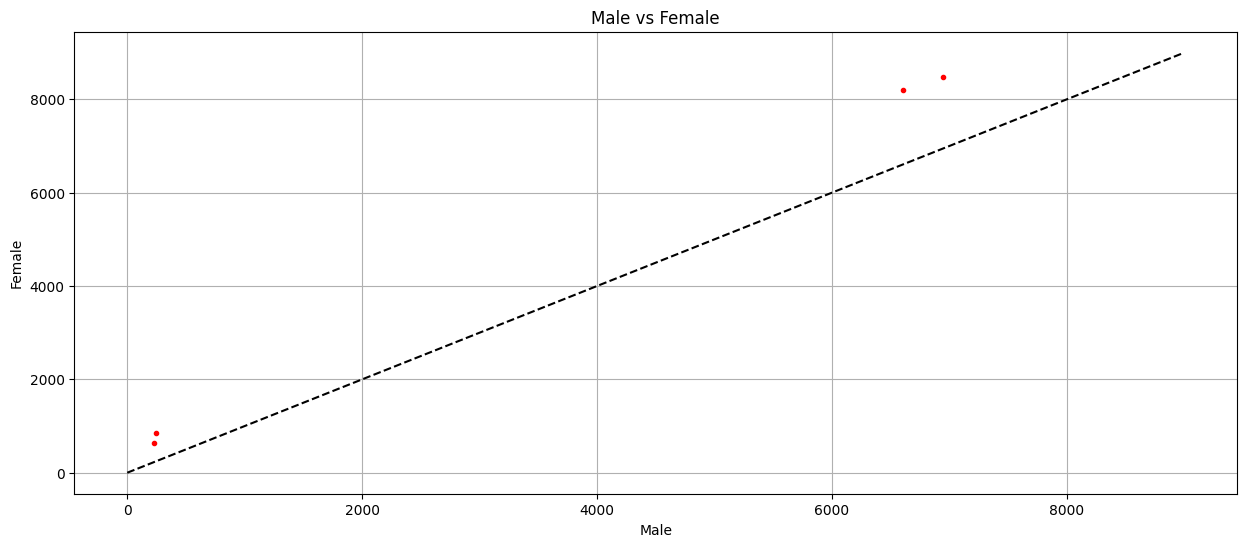

In [58]:
plt.figure(figsize = (15, 6))
plt.title('Male vs Female')
plt.xlabel('Male')
plt.ylabel('Female')
plt.grid()

plt.scatter('Male', 'Female', data = nireland, marker = '.', color = 'red')
# line to show where male = female
plt.plot([0, 9000], [0, 9000], '--', color = 'black')

<h2>What the Plot tells you</h2>
<p>Based on your plot, complete the following statements</p>
<ul>
<li>There are ________________ HE providers in Northern Ireland.</li>
<li>Two of the HE providers in Northern Ireland have over 6500 male students and over  ________________ female students.</li>
<li>There are two small HE providers in Northern Ireland, each with fewer than ________________ male students.</li>
<li>At all four HE providers in Northern Ireland, there are fewer ________________ than ________________.</li>
</ul>

<h2>Adding new Plots</h2>
<p>Add plots for the DataFrame that represent the number of students in Wales, the colour of the plots should be blue so that we can easier distinguish between the two different Countries.</p>

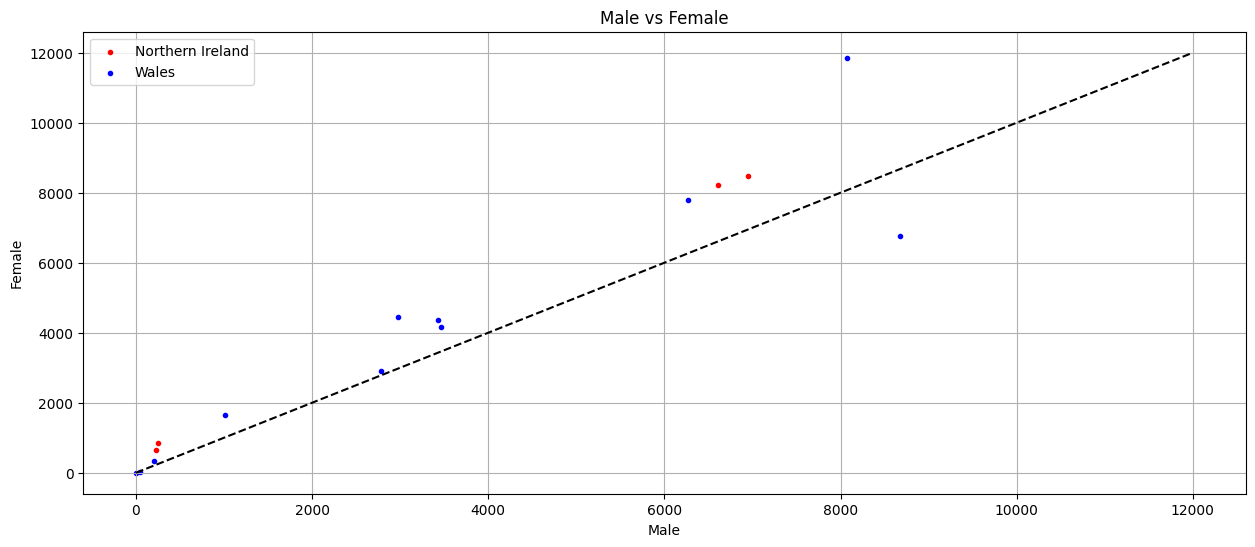

In [57]:
plt.figure(figsize = (15, 6))
plt.title('Male vs Female')
plt.xlabel('Male')
plt.ylabel('Female')
plt.grid()

plt.scatter('Male', 'Female', data = nireland, marker = '.', color = 'red', label = 'Northern Ireland')
plt.scatter('Male', 'Female', data = wales, color = 'blue', marker = '.', label = 'Wales')
plt.legend()
# line to show where male = female
plt.plot([0, 12000], [0, 12000], '--', color = 'black')

<h2>What the Plot tells you</h2>
<p>Based on your plot, complete the following statements</p>
<ul>
<li>Which Country has the HE provider with the fewest students?   ________________ </li>
<li>Which Country has the only HE provider with more male students than female students?  ________________, approximately how many students are there? ________________  </li>
<li>How many HE providers have less than 10,000 students? ________________</li>
<li>Which Country has the most HE providers with over 8000 female students? ________________</li>
</ul>

<h2>Adding new Plots</h2>
<p>Add plots for the DataFrame that represents HE providers located in Scotland, the colour of the plots should be green.</p>

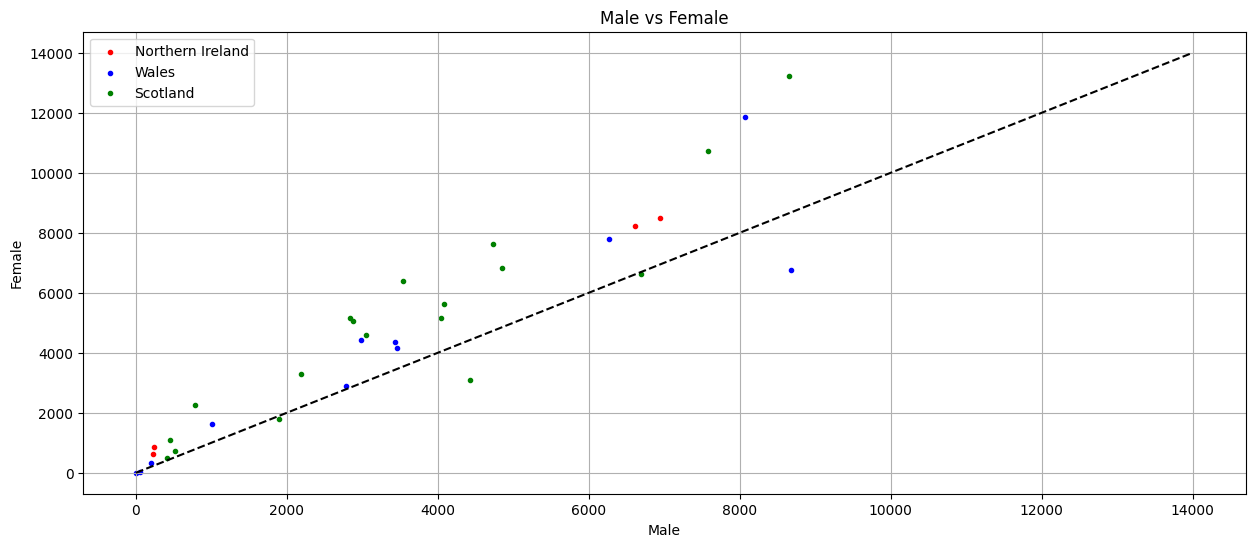

In [60]:
plt.figure(figsize = (15, 6))
plt.title('Male vs Female')
plt.xlabel('Male')
plt.ylabel('Female')
plt.grid()

plt.scatter('Male', 'Female', data = nireland, marker = '.', color = 'red', label = 'Northern Ireland')
plt.scatter('Male', 'Female', data = wales, color = 'blue', marker = '.', label = 'Wales')
plt.scatter('Male', 'Female', data = scotland, color = 'green', marker = '.', label = 'Scotland')
plt.legend()
# line to show where male = female
plt.plot([0, 14000], [0, 14000], '--', color = 'black')

<h2>What the Plot tells you</h2>
<p>Based on your plot, complete the following statements</p>
<ul>
<li>Which Country has the most HE providers?   ________________ </li>
<li>One HE provider has over 13,000 female students, and over ________________ male students. </li>
<li>________________ has more HE providers than both ________________ and ________________ combined.</li>
<li>Roughly (eye balling the graph), how many HE providers have approximatley the same number of male and female students? ________________</li>
</ul>

<h2>Adding new Plots</h2>
<p>Add plots for the DataFrame that represents HE providers in England, the colour of the plots should be yellow.  There will many plots, therefore plot the England data before the other data.</p>

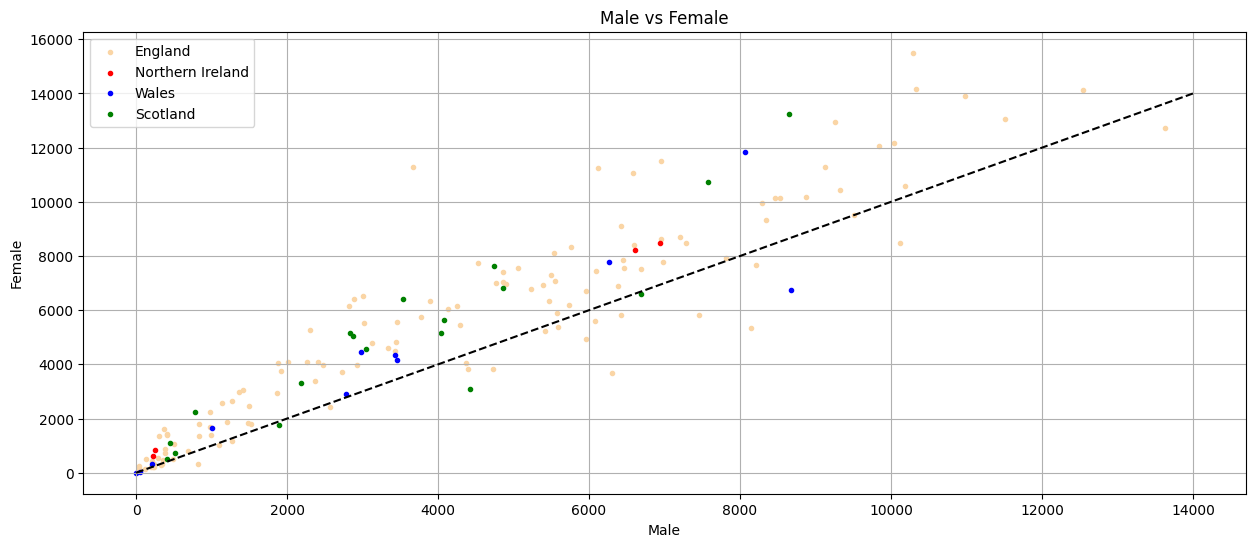

In [63]:
plt.figure(figsize = (15, 6))
plt.title('Male vs Female')
plt.xlabel('Male')
plt.ylabel('Female')
plt.grid()

plt.scatter('Male', 'Female', data = england, marker = '.', color = '#FAD5A5', label = 'England')
plt.scatter('Male', 'Female', data = nireland, marker = '.', color = 'red', label = 'Northern Ireland')
plt.scatter('Male', 'Female', data = wales, color = 'blue', marker = '.', label = 'Wales')
plt.scatter('Male', 'Female', data = scotland, color = 'green', marker = '.', label = 'Scotland')
plt.legend()
# line to show where male = female
plt.plot([0, 14000], [0, 14000], '--', color = 'black')

<h2>What the Plot tells you</h2>
<p>Based on your plot, complete the following statements</p>
<ul>
<li>What is one of the obvious drawbacks with scatter plots with many points?   ________________ </li>
<li>Approximatley how many HE providers have more than 10,000 male students? ________________</li>
<li>Excluding England, in which country is there an HE provider the most female students? ________________</li>
<li>Roughly (eye balling the graph), which country has an HE provider with nearly three times as many female students as male students? ________________</li>
</ul>

<h2>Export the DataFrames</h2>
<p>We will use the same data in the next set of lab notes, export DataFrames england, scotland, wales and nireland to csv files.</p>

In [64]:
england.to_csv('england.csv')
scotland.to_csv('scotland.csv')
wales.to_csv('wales.csv')
nireland.to_csv('nireland.csv')

<h2>Your Custom Plots</h2>
<p>Create your own custom plots, for example you might want to exclude all HE providers from the plot that has fewer than 500 male students and 500 female students.  Or perhaps you are only interested in the 10% of HE providers with the largest student population.  Experiment with different styles/designs of plot to really enhance them, i.e. try different plot markers and marker sizes.  Be creative and have fun. </p>

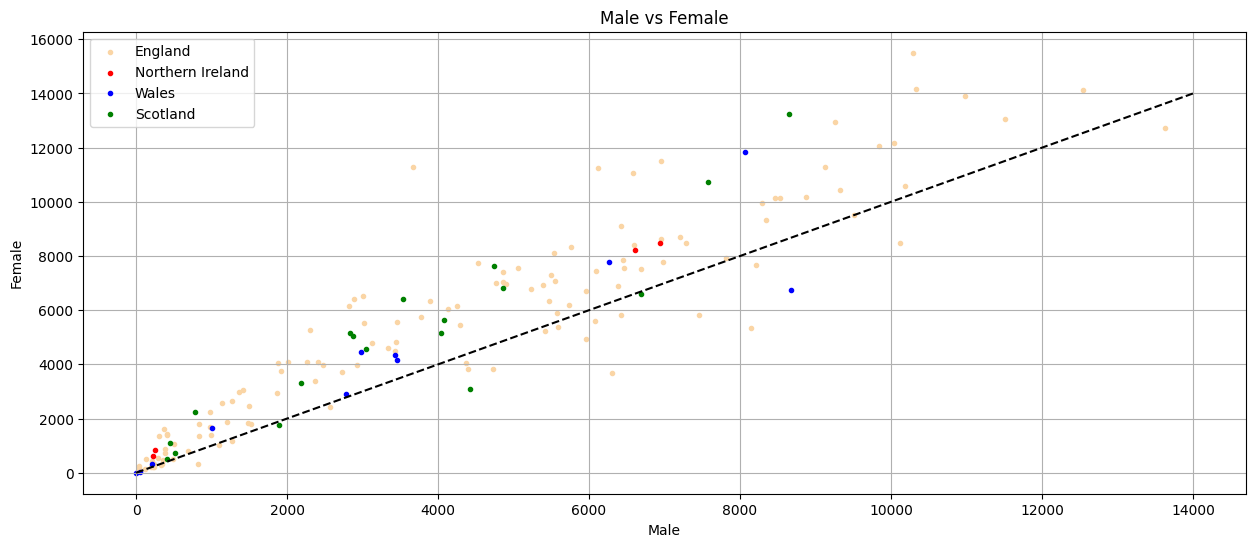

In [65]:
plt.figure(figsize = (15, 6))
plt.title('Male vs Female')
plt.xlabel('Male')
plt.ylabel('Female')
plt.grid()

plt.scatter('Male', 'Female', data = england, marker = '.', color = '#FAD5A5', label = 'England')
plt.scatter('Male', 'Female', data = nireland, marker = '.', color = 'red', label = 'Northern Ireland')
plt.scatter('Male', 'Female', data = wales, color = 'blue', marker = '.', label = 'Wales')
plt.scatter('Male', 'Female', data = scotland, color = 'green', marker = '.', label = 'Scotland')
plt.legend()
# line to show where male = female
plt.plot([0, 14000], [0, 14000], '--', color = 'black')